In [ ]:
import numpy as np
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam

# Mount google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Change the current working directory

In [ ]:
# Navigate to the image folder
os.chdir("/content/drive/My Drive/Dataset/")
os.getcwd()

'/content/drive/My Drive/Dataset'

In [ ]:
!ls "/content/drive/My Drive/Dataset/train_set"

a_10.jpg  a_19.jpg  a_27.jpg  a_35.jpg	a_6.jpg    la_15.jpg  la_23.jpg  la_31.jpg  la_3.jpg
a_11.jpg  a_1.jpg   a_28.jpg  a_36.jpg	a_7.jpg    la_16.jpg  la_24.jpg  la_32.jpg  la_40.jpg
a_12.jpg  a_20.jpg  a_29.jpg  a_37.jpg	a_8.jpg    la_17.jpg  la_25.jpg  la_33.jpg  la_4.jpg
a_13.jpg  a_21.jpg  a_2.jpg   a_38.jpg	a_9.jpg    la_18.jpg  la_26.jpg  la_34.jpg  la_5.jpg
a_14.jpg  a_22.jpg  a_30.jpg  a_39.jpg	la_10.jpg  la_19.jpg  la_27.jpg  la_35.jpg  la_6.jpg
a_15.jpg  a_23.jpg  a_31.jpg  a_3.jpg	la_11.jpg  la_1.jpg   la_28.jpg  la_36.jpg  la_7.jpg
a_16.jpg  a_24.jpg  a_32.jpg  a_40.jpg	la_12.jpg  la_20.jpg  la_29.jpg  la_37.jpg  la_8.jpg
a_17.jpg  a_25.jpg  a_33.jpg  a_4.jpg	la_13.jpg  la_21.jpg  la_2.jpg	 la_38.jpg  la_9.jpg
a_18.jpg  a_26.jpg  a_34.jpg  a_5.jpg	la_14.jpg  la_22.jpg  la_30.jpg  la_39.jpg


In [ ]:
!ls "/content/drive/My Drive/Dataset/test_set"

a_41.jpg  a_44.jpg  a_47.jpg  a_50.jpg	 la_43.jpg  la_46.jpg  la_49.jpg
a_42.jpg  a_45.jpg  a_48.jpg  la_41.jpg  la_44.jpg  la_47.jpg  la_50.jpg
a_43.jpg  a_46.jpg  a_49.jpg  la_42.jpg  la_45.jpg  la_48.jpg


In [ ]:
# Path to train set and test set in google drive
train_data_dir = '/content/drive/My Drive/Dataset/train_set/'
test_data_dir = '/content/drive/My Drive/Dataset/test_set/'

# Create dataFrames for training and testing with filenames and corresponding categories


In [ ]:

files1 = os.listdir(train_data_dir)
categories = []

for filename in files1:
  category = filename.split('_')[0]
  if category == 'a' :
    categories.append(1)
  elif category == 'la' :
    categories.append(0)
  else:
    pass
df_train = pd.DataFrame({
    'filename' : files1,
    'category' : categories
})


files2 = os.listdir(test_data_dir)
categories = []

for filename in files2:
  category = filename.split('_')[0]
  if category == 'a' :
    categories.append(1)
  elif category == 'la' :
    categories.append(0)
  else:
    pass
df_test = pd.DataFrame({
    'filename' : files2,
    'category' : categories
})

In [ ]:
df_train

,filename,category
0,a_33.jpg,1
1,a_24.jpg,1
2,a_28.jpg,1
3,a_29.jpg,1
4,a_34.jpg,1
...,...,...
75,la_16.jpg,0
76,la_19.jpg,0
77,a_22.jpg,1
78,a_39.jpg,1


In [ ]:
df_test

,filename,category
0,a_45.jpg,1
1,a_49.jpg,1
2,a_44.jpg,1
3,a_46.jpg,1
4,a_48.jpg,1
5,a_42.jpg,1
6,a_47.jpg,1
7,a_41.jpg,1
8,a_50.jpg,1
9,a_43.jpg,1


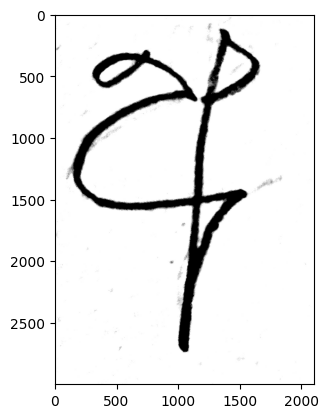

In [ ]:
# display a random character
img = Image.open('/content/drive/My Drive/Dataset/train_set/a_40.jpg')
plt.imshow(img)

In [ ]:
#from tensorflow.keras.preprocessing.image import load_img, img_to_array
def load_and_preprocess_images(data_frame, image_path_col, label_col, image_size=(224, 224), data_dir=''):
    images = []
    labels = []

    for index, row in data_frame.iterrows():
        image_path = os.path.join(data_dir, row[image_path_col])
        image = load_img(image_path, target_size=image_size)
        image_array = img_to_array(image)
        images.append(image_array)
        labels.append(row[label_col])

    images = np.array(images)
    labels = np.array(labels)

    return images, labels


In [ ]:
# load and preprocess images for training
image_size = (224, 224)
x_train, y_train = load_and_preprocess_images(df_train, 'filename', 'category', image_size=image_size, data_dir=train_data_dir)
# load and preprocess images for testing
x_test, y_test = load_and_preprocess_images(df_test, 'filename', 'category', image_size=image_size, data_dir=test_data_dir)

In [ ]:
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (80, 224, 224, 3)
Training labels shape: (80,)
Testing data shape: (20, 224, 224, 3)
Testing labels shape: (20,)


In [ ]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build CNN model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=8)

Epoch 1/5
10/10 [==============================] - 14s 1s/step - loss: 0.9502 - accuracy: 0.5500
Epoch 2/5
10/10 [==============================] - 10s 994ms/step - loss: 0.6816 - accuracy: 0.5000
Epoch 3/5
10/10 [==============================] - 11s 1s/step - loss: 0.6464 - accuracy: 0.8250
Epoch 4/5
10/10 [==============================] - 11s 1s/step - loss: 0.6121 - accuracy: 0.6250
Epoch 5/5
10/10 [==============================] - 11s 1s/step - loss: 0.4734 - accuracy: 0.9875


# Model evaluation

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 1s 884ms/step - loss: 0.3887 - accuracy: 1.0000


[0.38867583870887756, 1.0]

# Predict the class for a random character from the test set

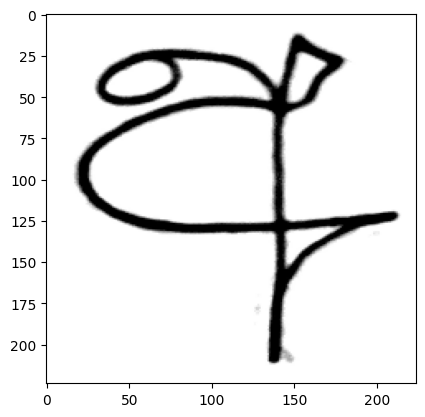

1/1 [==============================] - 0s 74ms/step
Predicted Character : a
Predicted Probability : 0.7314


In [ ]:
random_index = random.randint(0, len(df_test) - 1) # select a random image from the test set
random_image_path = os.path.join(test_data_dir, df_test['filename'][random_index])

random_image = load_img(random_image_path, target_size=image_size) # display the selected random image
plt.imshow(random_image)
plt.show()

# preprocess the image
random_image_array = img_to_array(random_image)
random_image_array = np.expand_dims(random_image_array, axis=0)
random_image_array = random_image_array / 255.0  # Normalize pixel values

# make a prediction using the model
prediction = model.predict(random_image_array)

# interpret the prediction
predicted_class = 'a' if prediction[0][0] > 0.5 else 'la'
probability = prediction[0][0] if predicted_class == 'a' else 1 - prediction[0][0]

print(f'Predicted Character : {predicted_class}')
print(f'Predicted Probability : {probability:.4f}')  # confident
